## *Importación de librerías y cargas de datos*

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr, chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
PROCESSED_PATH = Path("datos_procesados.parquet")
df = pd.read_parquet(PROCESSED_PATH)
df['Severity'] = pd.Categorical(df['Severity'], categories=[1, 2, 3, 4], ordered=True)

## *Función para Calcular Cramér's V*

In [3]:
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

## *Análisis de Variables Dicotómicas (Infraestructura)*

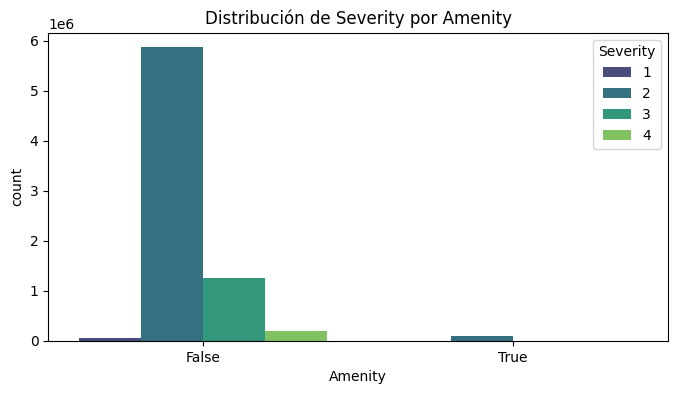

Amenity: Cramer's V = 0.0388


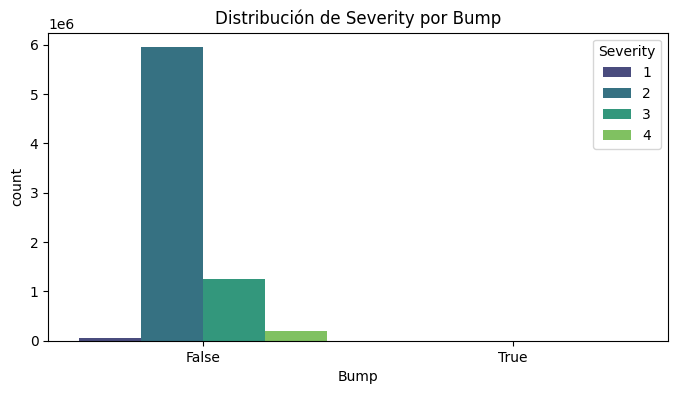

Bump: Cramer's V = 0.0064


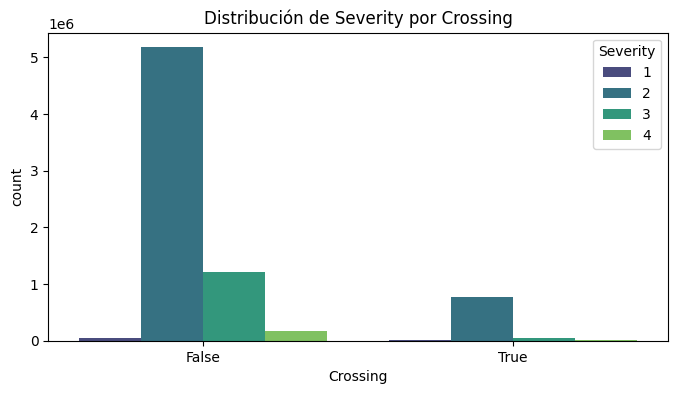

Crossing: Cramer's V = 0.1209


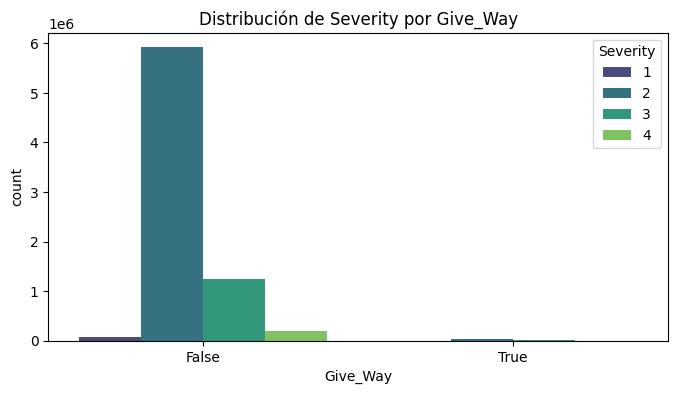

Give_Way: Cramer's V = 0.0094


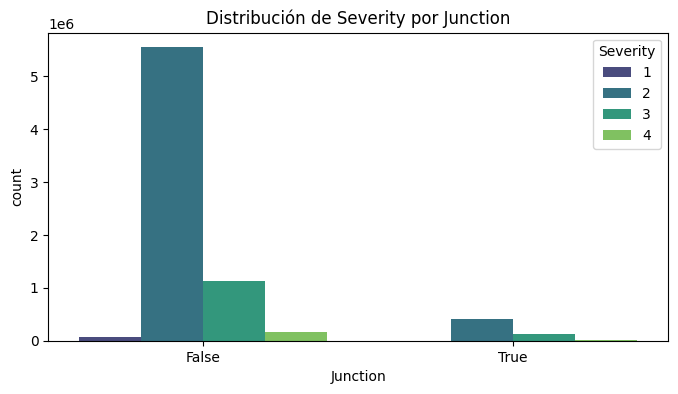

Junction: Cramer's V = 0.0535


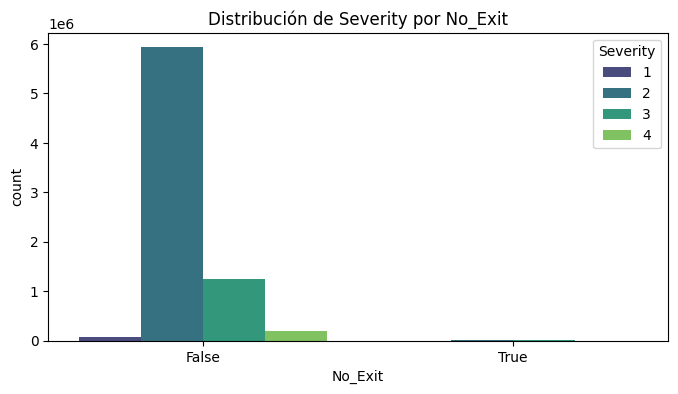

No_Exit: Cramer's V = 0.0121


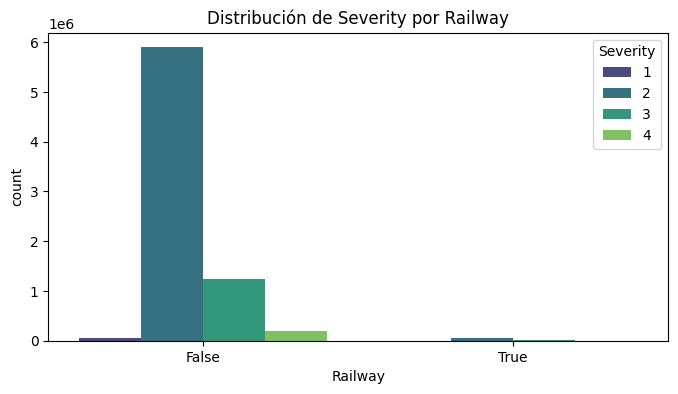

Railway: Cramer's V = 0.0136


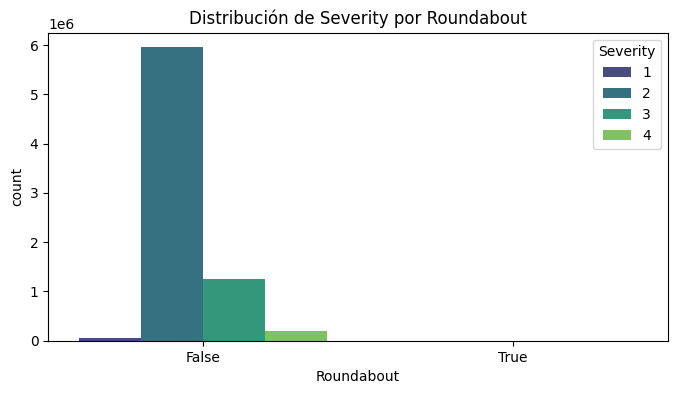

Roundabout: Cramer's V = 0.0023


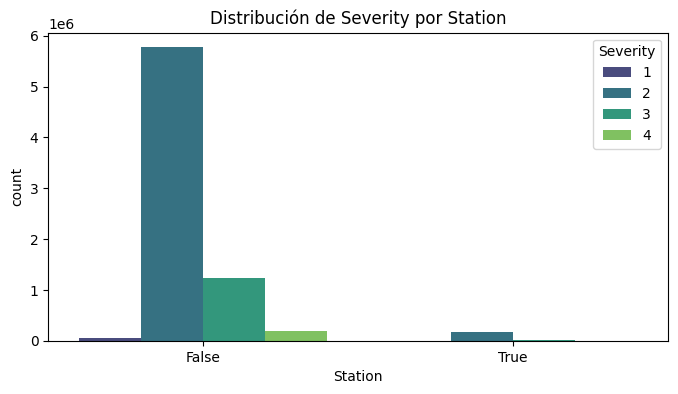

Station: Cramer's V = 0.0504


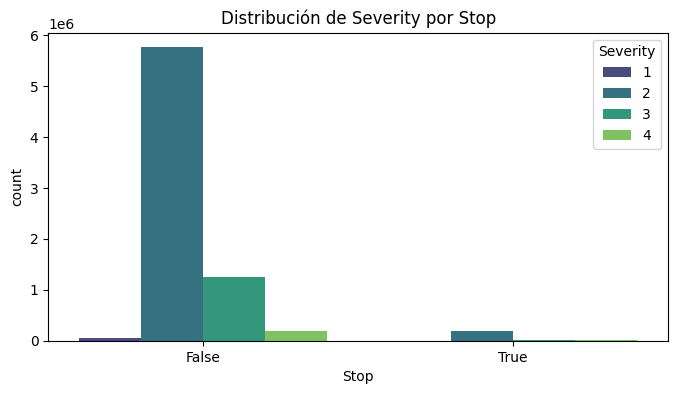

Stop: Cramer's V = 0.0600


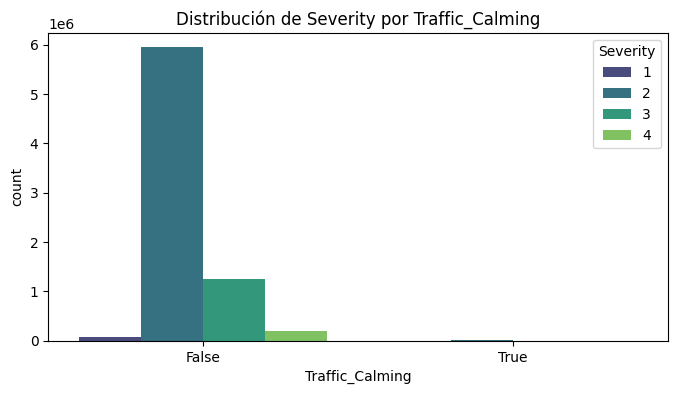

Traffic_Calming: Cramer's V = 0.0062


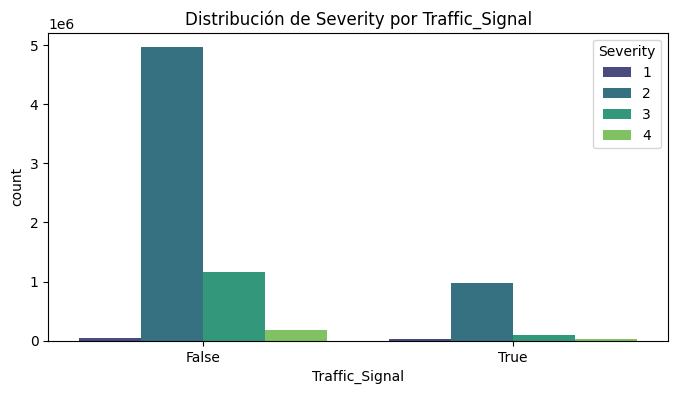

Traffic_Signal: Cramer's V = 0.1207


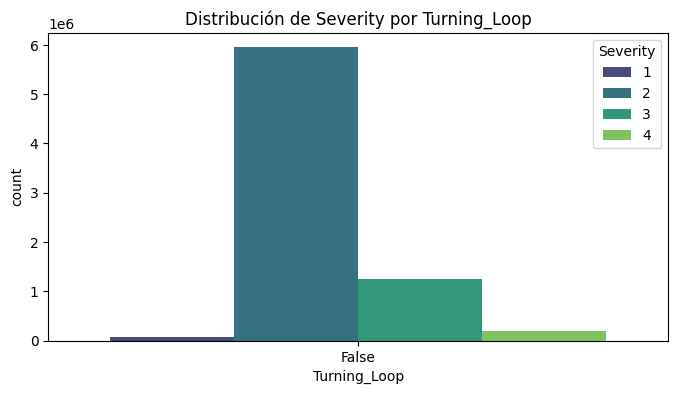

Turning_Loop: Cramer's V = nan


C:\Users\Sara\AppData\Local\Temp\ipykernel_16808\2296536025.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [ ]:
dichotomous_vars = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
for var in dichotomous_vars:

    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, hue='Severity', data=df, palette='viridis')
    plt.title(f'Distribución de Severity por {var}')
    plt.show()

    contingency_table = pd.crosstab(df[var], df['Severity'])
    cramers_v_value = cramers_v(contingency_table)
    print(f'{var}: Cramer\'s V = {cramers_v_value:.4f}')

# *Análisis de Variables Geográficas*

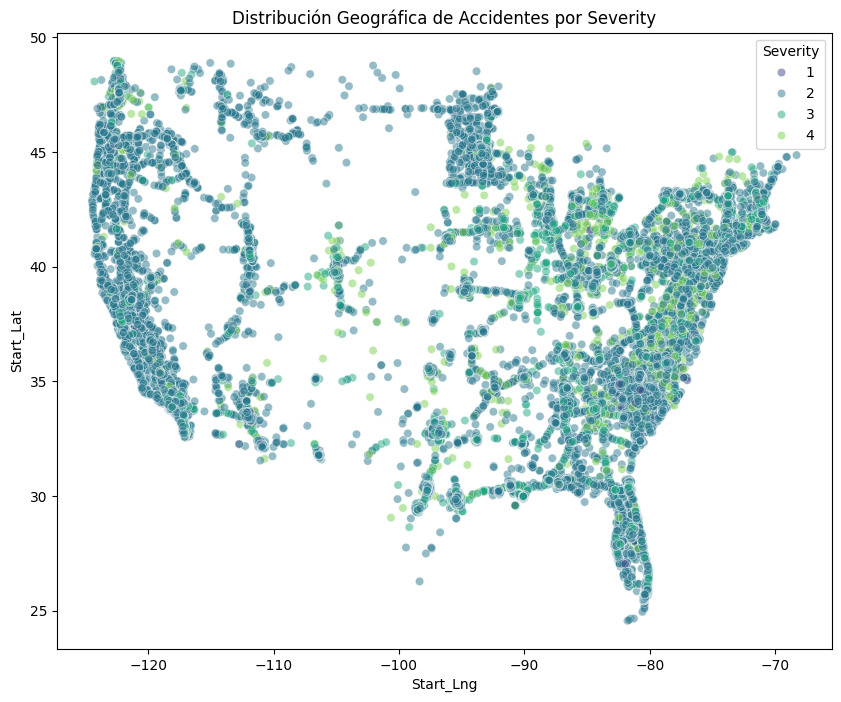

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Start_Lng', y='Start_Lat', hue='Severity', data=df.sample(frac=0.01), palette='viridis', alpha=0.5)  # Muestreo para evitar sobrecarga
plt.title('Distribución Geográfica de Accidentes por Severity')
plt.show()

# *Análisis de variables temporales*

In [7]:
df['Hour'] = pd.to_datetime(df['Start_Time']).dt.hour

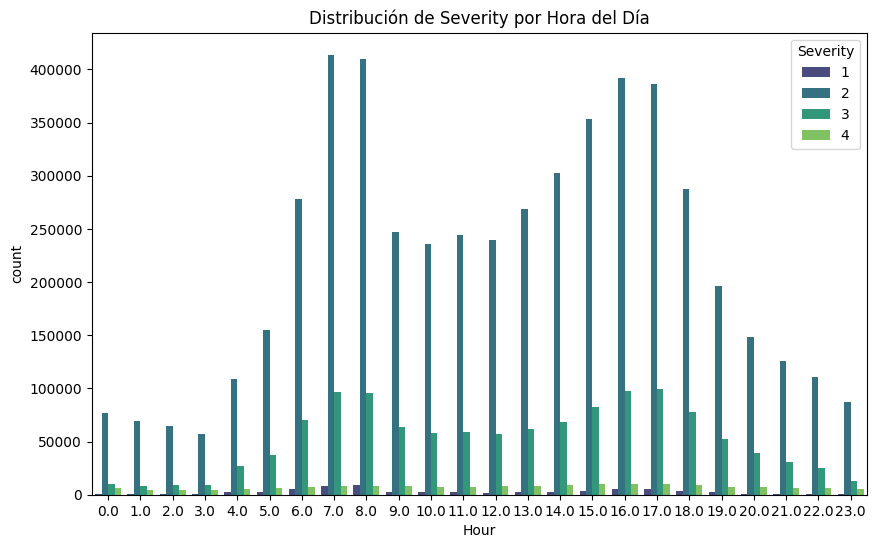

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', hue='Severity', data=df, palette='viridis')
plt.title('Distribución de Severity por Hora del Día')
plt.show()

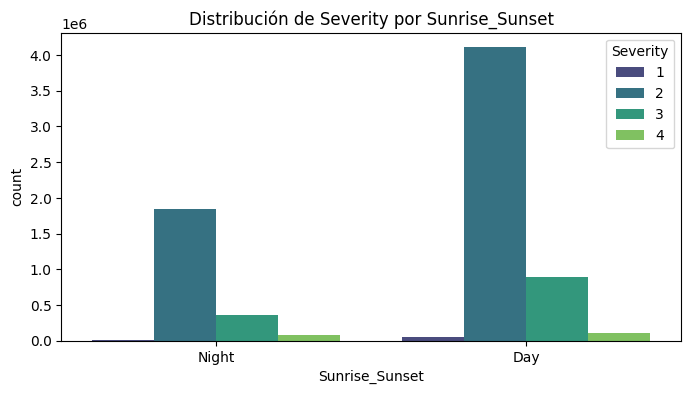

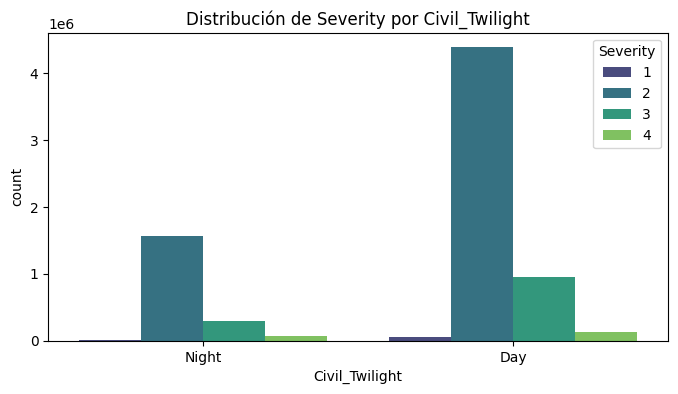

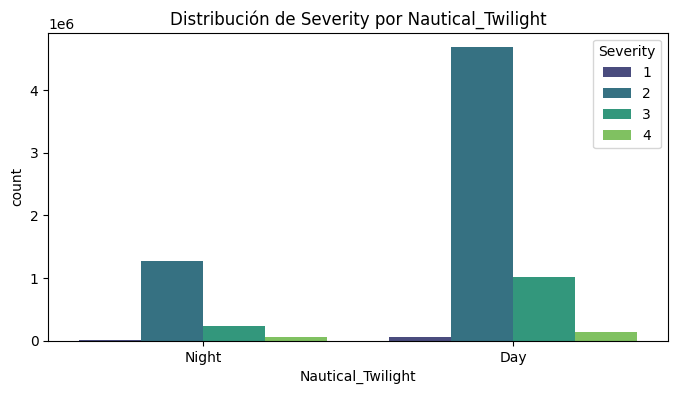

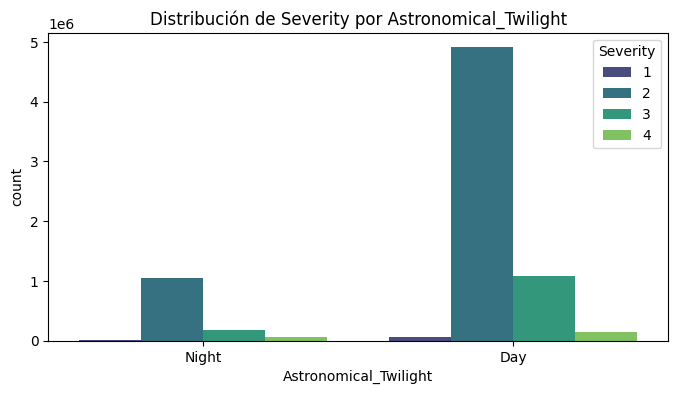

In [9]:
#Análisis de Condiciones de Iluminación 
light_conditions = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for condition in light_conditions:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=condition, hue='Severity', data=df, palette='viridis')
    plt.title(f'Distribución de Severity por {condition}')
    plt.show()

## *Análisis de Variables de Tiempo y Clima*

C:\Users\Sara\AppData\Local\Temp\ipykernel_16808\3958495054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Temperature(C)', data=df, palette='viridis')


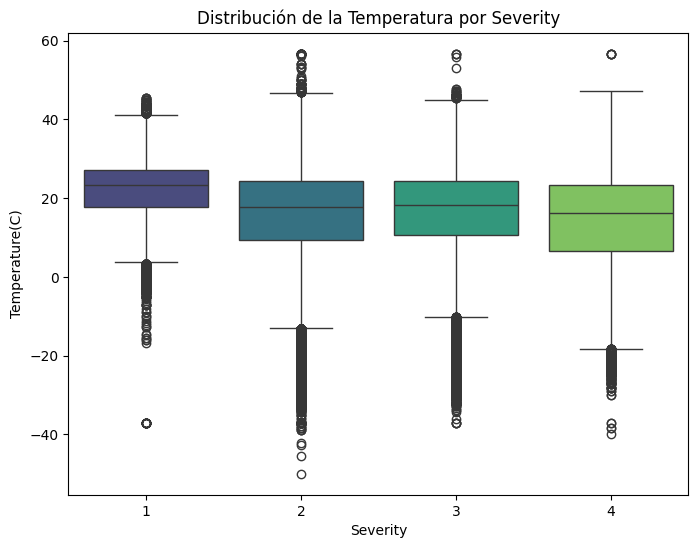

In [10]:
# Relación entre temperatura y severidad
plt.figure(figsize=(8, 6))
sns.boxplot(x='Severity', y='Temperature(C)', data=df, palette='viridis')
plt.title('Distribución de la Temperatura por Severity')
plt.show()

C:\Users\Sara\AppData\Local\Temp\ipykernel_16808\3530062439.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Visibility(km)', data=df, palette='viridis')


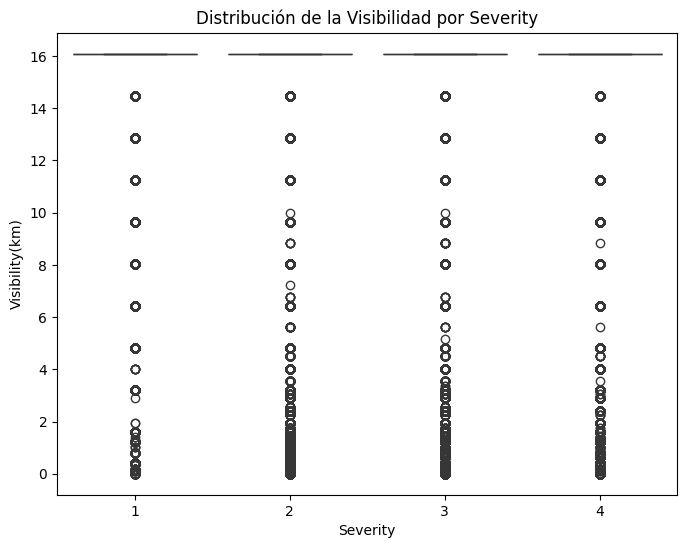

In [11]:
# Relación entre visibilidad y severidad
plt.figure(figsize=(8, 6))
sns.boxplot(x='Severity', y='Visibility(km)', data=df, palette='viridis')
plt.title('Distribución de la Visibilidad por Severity')
plt.show()

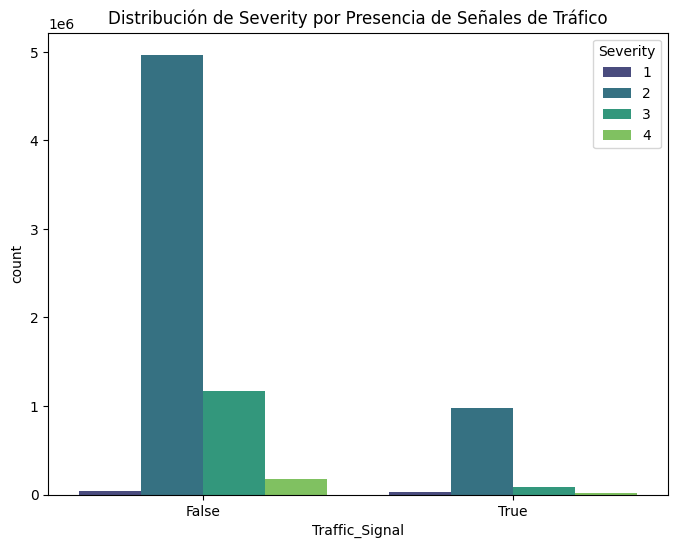

In [12]:
# 5. Análisis de Variables de Tráfico
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic_Signal', hue='Severity', data=df, palette='viridis')
plt.title('Distribución de Severity por Presencia de Señales de Tráfico')
plt.show()